In [14]:
import os

In [15]:
import pandas as pd

In [16]:
wines = pd.read_csv('WineQT.csv')

In [17]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [18]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [19]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [20]:
import matplotlib.pyplot as plt

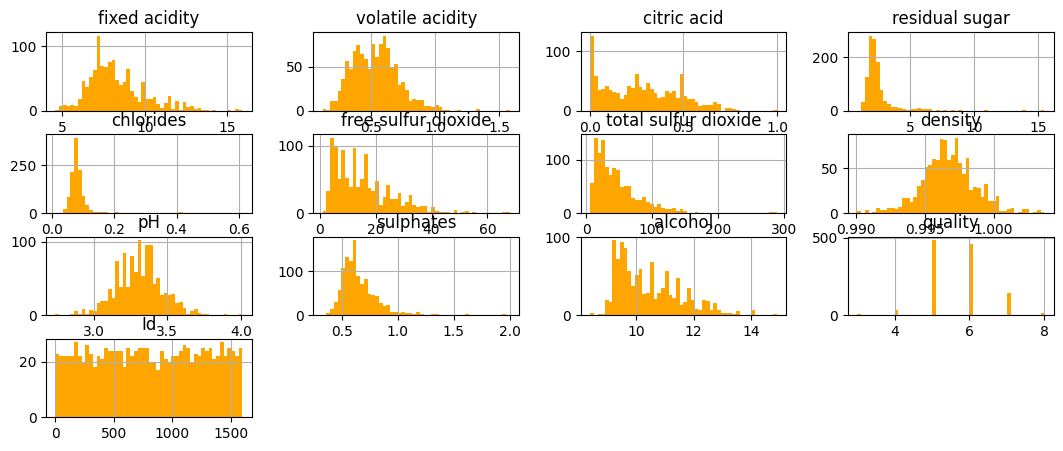

In [21]:
wines.hist(bins=50,figsize=(13,5),color='orange')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=wines.drop(['quality'],axis=1)
# 0means rows
# 1 means columns
y=wines['quality']

In [24]:
x.head(
)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [25]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)

In [31]:
print(x_train.shape)
print(x_test.shape)

(914, 12)
(229, 12)


In [32]:
print(y_train.shape)
print(y_test.shape)

(914,)
(229,)


In [33]:
from sklearn.linear_model import ElasticNet

In [34]:
lr=ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=55)
lr.fit(x_train,y_train)

ElasticNet(alpha=0.1, random_state=55)

In [36]:
# evaluation metrics for ragression task
# mse/mae/r2score

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [44]:
def eval_metric(actual,pred):
    rmse=np.sqrt(mean_squared_error(actual,pred))
    mae=mean_absolute_error(actual,pred)
    r2=r2_score(actual,pred)

    return rmse,mae,r2

In [47]:
pred_val=lr.predict(x_test)

In [48]:
pred_val

array([5.54509503, 5.79855682, 5.32214337, 5.44870399, 5.9842201 ,
       5.59658308, 5.30100549, 5.51021606, 5.87154616, 5.4610545 ,
       5.74648797, 5.80502347, 5.44118378, 5.60154556, 5.21527211,
       5.69210421, 6.31695214, 5.68333869, 5.58014812, 5.25975067,
       5.52837022, 5.72572849, 5.51996248, 5.52498955, 6.14534406,
       5.52940549, 5.69743005, 5.92902308, 5.53421374, 5.49324092,
       5.9693432 , 5.97524211, 6.33677625, 6.18827455, 5.54961464,
       6.10843539, 5.49740038, 5.24937103, 5.40045178, 5.29615025,
       5.5213304 , 5.23651355, 5.38655818, 5.50648799, 5.52492026,
       5.42294919, 5.29259256, 5.25429134, 5.32090894, 5.8432711 ,
       5.94426536, 5.45400844, 5.91304849, 6.20360334, 6.19033549,
       5.23511181, 5.52822444, 5.56816116, 5.15052697, 5.24695367,
       6.11538317, 5.41606265, 5.74178485, 6.11549266, 5.87844789,
       5.34838187, 5.38413469, 6.02399259, 5.51932674, 5.35566525,
       6.18041817, 5.96663824, 5.95929015, 5.45473357, 6.13075

In [49]:
(rmse,mae,r2)=eval_metric(y_test,pred_val)

In [50]:
print('rmse = ',rmse)

rmse =  0.7449393625090241


In [51]:
print('mae = ',mae)
print('r2_score =', r2)

mae =  0.583476479304613
r2_score = 0.23894219936369998
